In [2]:
#coding=utf-8
from urllib.request import urlopen
import time
from selenium import webdriver
import urllib


driver = webdriver.Chrome()
# driver = webdriver.Chrome(executable_path='C:\\Users\\Name\\AppData\\Local\\Google\\Chrome\\Application\\chromedriver.exe')
driver.get("https://mifengcha.com/announcement")

max_num_page = 20

for i in range(max_num_page):
    driver.execute_script("window.scrollBy(0,3000)")
    time.sleep(1)

# site_url = "https://mifengcha.com/announcement"
# headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:23.0) Gecko/20100101 Firefox/23.0'}
# req = urllib.request.Request(url=site_url, headers=headers)

# content = urlopen(req).read().decode('utf-8')

content = driver.page_source


WebDriverException: Message: 'chromedriver' executable needs to be in PATH. Please see https://sites.google.com/a/chromium.org/chromedriver/home


In [64]:
from bs4 import BeautifulSoup
import csv



soup = BeautifulSoup(content, features='lxml')
all_items = soup.find_all("div",{'class':'list-item'})
print(len(all_items))

coin_types_dist = {}

for item in all_items:
    datas = item.find_all('div',{'class':'cell'})
    print('----------------')
    item_data = []
    for data in datas:
        if (data.find_all("a",{'class':'original-link'})):
            url_info = data.find_all("a",{'class':'original-link'})
            url = url_info[0]
            url = str(url).split('href')[1].split('=')[1].split(' ')[0].split('"')[1]
            item_data.append(url)
        else:
            item_data.append(data.get_text())
            
#         print(data.get_text())
#         for url in data.find_all("a",{'class':'original-link'}):
#             print(url)
#         item_data.append(data.get_text())
#     with open('data.csv','wb') as csvfile:
#         writer = csv.writer(csvfile, dialect='excel')
#         print(type(item_data))
#         writer.writerow(item_data)
        
    print(item_data)
    
    
    # 判断币种类，加到币类型分布字典里
    if item_data[3]:
        if item_data[3] not in coin_types_dist:
            coin_types_dist[item_data[3]] = 1
        else:
            coin_types_dist[item_data[3]] += 1

330
----------------
[' MXC', '币种上线', 'MXC平台关于上线FSN的公告', '', '4小时前', 'https://mxc-exchange.zendesk.com/hc/zh-cn/articles/360038105092-MXC%E5%B9%B3%E5%8F%B0%E5%85%B3%E4%BA%8E%E4%B8%8A%E7%BA%BFFSN%E7%9A%84%E5%85%AC%E5%91%8A']
----------------
[' MXC', '币种上线', 'MXC平台上线FSN的公告', '', '4小时前', 'https://mxc-exchange.zendesk.com/hc/zh-cn/articles/360038476691-MXC%E5%B9%B3%E5%8F%B0%E4%B8%8A%E7%BA%BFFSN%E7%9A%84%E5%85%AC%E5%91%8A']
----------------
[' MXC', '活动', 'MXC平台充值投票上线活动公告', 'EOS', '6小时前', 'https://mxc-exchange.zendesk.com/hc/zh-cn/articles/360038104412-MXC%E5%B9%B3%E5%8F%B0%E5%85%85%E5%80%BC%E6%8A%95%E7%A5%A8%E4%B8%8A%E7%BA%BF%E6%B4%BB%E5%8A%A8%E5%85%AC%E5%91%8A']
----------------
[' MXC', '其它', 'MXC平台关于延期上线FSN的公告', '', '7小时前', 'https://mxc-exchange.zendesk.com/hc/zh-cn/articles/360038477751-MXC%E5%B9%B3%E5%8F%B0%E5%85%B3%E4%BA%8E%E5%BB%B6%E6%9C%9F%E4%B8%8A%E7%BA%BFFSN%E7%9A%84%E5%85%AC%E5%91%8A']
----------------
[' LBank', '活动', '关于“回家的车票, 乡愁的味道”主题活动第五期中奖名单的公布', '', '7小时前', 'https://lban

{'ETH': 51, 'BTC': 17, 'EOS': 10, 'SUTER': 8, 'KSM': 5, 'FT': 5, 'DT': 4, 'CET': 4, 'ACC': 3, 'LTC': 3, 'GT': 3, 'TRX': 3, 'USDT': 2, 'AAT': 2, 'HB10': 2, 'BNB': 2, 'WIN': 2, 'JDC': 2, 'PLF': 2, 'YTA': 2, 'VALOR': 2, 'BIX': 2, 'PAX': 2, 'IOST': 2, 'LBC': 2, 'BKK': 2, 'QRL': 2, 'XEM': 2, 'IOTA': 2, 'DASH': 1, 'ONT': 1, 'CSAC': 1, 'ZIL': 1, 'PTN': 1, 'CTXC': 1, 'GXC': 1, 'BIA': 1, 'USDC': 1, 'BPX': 1, 'ACOIN': 1, 'MED': 1, 'OUNA': 1, 'ARDR': 1, 'XRP': 1, 'LOOM': 1, 'LUCKY': 1, 'LUNA': 1, 'NEAL': 1, 'OAS': 1, 'LNKO': 1, 'PIVX': 1, 'SOC': 1, 'TROY': 1, 'TRTL': 1, 'COU': 1, 'VET': 1, 'FC': 1, 'XWP': 1, 'WET': 1, 'BHP': 1, 'LBK': 1, 'HTB': 1, 'ARN': 1, 'AION': 1, 'ALGO': 1, 'BUSD': 1, 'RDN': 1, 'FOIN': 1, 'BHD': 1, 'FOG': 1, 'GOLD': 1, 'OKB': 1, 'SKR': 1, 'RBTC': 1, 'ET': 1, 'SPYCE': 1, 'GOM': 1, 'HUB': 1, 'KCS': 1, 'QASH': 1, 'FAB': 1, 'CRO': 1, 'HT': 1, 'N8V': 1, 'HYC': 1, 'ARPA': 1, 'GRFT': 1, 'AE': 1, 'BURN': 1, 'INS': 1, 'DNS': 1, 'NULS': 1, 'CKUSD': 1, 'GMAT': 1, 'LAMB': 1, 'VRA': 1, '

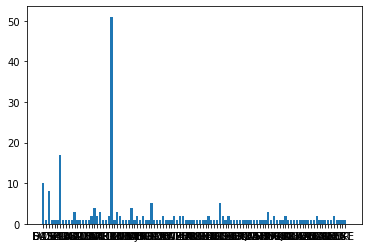

In [70]:
from matplotlib import pyplot as plt
import collections


# x = {1: 2, 3: 4, 4: 3, 2: 1, 0: 0}
coin_data_sorted = {k: v for k, v in sorted(coin_types_dist.items(), key=lambda x: x[1],reverse=True)}


print(coin_data_sorted)

plot_data = {k: coin_data_sorted[k] for k in list(coin_data_sorted)[:10]}
print(plot_data)


plt.bar(range(len(coin_types_dist)), list(coin_types_dist.values()), align='center')
plt.xticks(range(len(coin_types_dist)), list(coin_types_dist.keys()))
# ax.set_xlabel("Year")  #设置x轴标签
# ax.set_ylabel("Dogs Eaten")  #设置y轴标签
# ax.set_title("Hotdog game scores 1980-2010")  #设置标题
# ax.set_xlim(1979,2011)  #设置x轴数据限值
plt.show()  #显示图像